In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [4]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending = pd.read_csv('./Resources/lending_data.csv')

# Review the DataFrame
lending

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [8]:
# Separate the data into labels and features
y = lending['loan_status']
X = lending.drop(columns='loan_status')
# Separate the y variable, the labels

# Separate the X variable, the features


In [9]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [10]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [11]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [12]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [13]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_model = LogisticRegression()



# Fit the model using training data
logistic_model.fit(X_train, y_train)

LogisticRegression()

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [14]:
# Make a prediction using the testing data
logistic_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
results = pd.DataFrame({
    'observd' : y_test,
    'estimated' : logistic_model.predict(X_test)
})
results['compare'] = results['observd'] == results['estimated']
results.groupby(['estimated','observd']).count()

compare
estimated observd         
0         0          18663
          1             56
1         0            102
          1            563

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [18]:
# Print the balanced_accuracy score of the model
logistic_model.score(X_test, y_test)

0.9918489475856377

<Axes: >

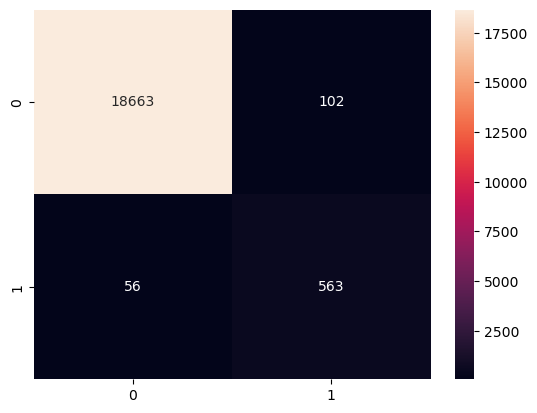

In [19]:
import seaborn as sns
# Generate a confusion matrix for the model
cnf = confusion_matrix(y_test, logistic_model.predict(X_test))
sns.heatmap(cnf, annot=True, fmt='.0f')

In [20]:
# Print the classification report for the model
print(classification_report(y_test, logistic_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model predicts both the healthy and the high risk loan pretty well, with an accuracy of 99%

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [21]:
# Import the RandomOverSampler module form imbalanced-learn






# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
lending_0 = lending[lending['loan_status']==0].sample(2500, random_state=1)
lending_1 = lending[lending['loan_status']==1]

# Fit the original training data to the random_oversampler model
lending_balanced = pd.concat([lending_0, lending_1])

In [22]:
# Count the distinct values of the resampled labels data
lending_balanced['loan_status'].value_counts()

0    2500
1    2500
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [23]:
# Instantiate the Logistic Regression model
y = lending_balanced['loan_status']
X = lending_balanced.drop(columns='loan_status')
# Assign a random_state parameter of 1 to the model
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, random_state=1)
logistic_model = LogisticRegression()



# Fit the model using training data
logistic_model.fit(X_train, y_train)

# Fit the model using the resampled training data
logistic_model.fit(X_train_b, y_train_b)

# Make a prediction using the testing data
logistic_model.predict(X_test_b)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [26]:
# Print the balanced_accuracy score of the model 
logistic_model.score(X_test_b, y_test_b)

0.9936

<Axes: >

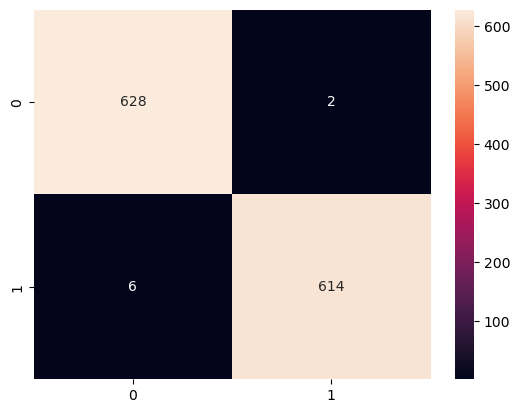

In [27]:
# Generate a confusion matrix for the model
cnf = confusion_matrix(y_test_b, logistic_model.predict(X_test_b))
sns.heatmap(cnf, annot=True, fmt='.0f')

In [28]:
# Print the classification report for the model
print(classification_report(y_test_b, logistic_model.predict(X_test_b)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       630
           1       1.00      0.99      0.99       620

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** In this case the balanced logistic regression model data works a little better, with a 0.2% better accuracy